Utilize a base de dados CIFAR-10 disponível no próprio Keras:
from keras.datasets import cifar10
(trainX, trainY), (testX, testY) = cifar10.load_data()

Apresentar gráficos mostrando o comportamento da função de erro/loss e da acurácia durante o treinamento (dados de treino e teste).

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(trainX, trainY), (testX, testY) = cifar10.load_data()
print('Dados de treino: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Dados de teste: X=%s, y=%s' % (testX.shape, testY.shape))

170508288/170498071 [==============================] - 2s 0us/step
Dados de treino: X=(50000, 32, 32, 3), y=(50000, 1)
Dados de teste: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

In [ ]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
# Importação dos pacotes
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import UpSampling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout

# carrega o modelo base ResNET com pesos Imagenet (que serão ajustados/treinados)
base_model = ResNet50(include_top=False, weights = 'imagenet', input_shape=(256, 256, 3))
# marca as camadas como não treináveis (não terão os pesos ajustados)
for layer in base_model.layers:
	layer.trainable = False

# Monta o modelo completo utilizando o modelo base
model = Sequential()
model.add(UpSampling2D((2,2),input_shape=(32, 32, 3)))
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Compilando a rede
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate=2e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [1]:
history = model.fit(trainX, trainY, epochs=20, batch_size=20, validation_data=(testX, testY))

NameError: ignored

## Análise da função *loss* (erro/perda)

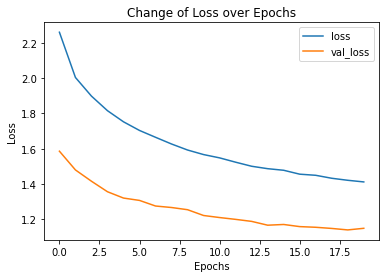

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Change of Loss over Epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

## Análise da métrica de desempenho (acurácia)

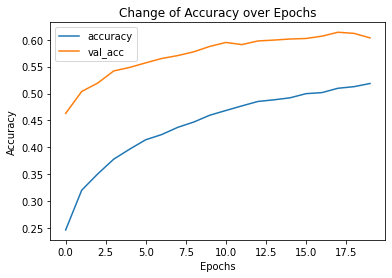

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title('Change of Accuracy over Epochs')
plt.legend(['accuracy', 'val_acc'])
plt.show()